In [1]:
# Import necessary libraries
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from skimage import io, color, feature, transform

In [2]:
# Load Mnist dataset
mnist = datasets.fetch_mldata('MNIST Original')
# Create list for relevant data column
img_tuple = list(zip(mnist.data, mnist.target))

# Store mnist data
images = mnist.data

# Size of data
data_size = len(images)
data_size

70000

In [3]:
#Preprocessing images
images = images.reshape(len(images), -1)
labels = mnist.target

In [4]:
#Initialize Logistic Regression
LR_classifier = LogisticRegression(C=50., penalty='l2', multi_class='multinomial', solver='sag', tol=0.01,
                                   n_jobs=-1)
#Training the data 
LR_classifier.fit(images, labels)

LogisticRegression(C=50.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='sag',
          tol=0.01, verbose=0, warm_start=False)

In [5]:
#Load a custom image 
digit_img = io.imread('images/digit.png')
#Convert image to grayscale
digit_img = color.rgb2gray(digit_img)

In [6]:
#Resize the image to 28x28
digit_img = transform.resize(digit_img, (28, 28), mode="wrap")

/home/ratan/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


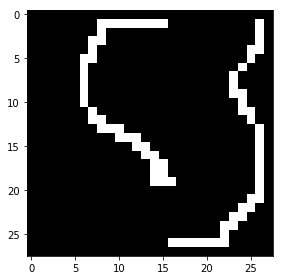

In [7]:
#Run edge detection on the image 
digit_edge = feature.canny(digit_img, sigma=5) 

io.imshow(digit_edge)
io.show()

digit_edge = digit_edge.flatten()